In [110]:
using Plots
using Optim
using LinearAlgebra
using DataFrames
using GLM
using CSV
using TypedTables
using Metrics
include("markovvec.jl")
include("functions.jl")

Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
┌ Warning: Module StatsBase with build ID fafbfcfd-5c7b-6c16-0000-00dd9cfdb64e is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Metrics.TFPN :: Tuple{A

convert_to_float_array (generic function with 1 method)

In [575]:
N = 1000
m = 1.67e-27
Tinit = 300
step = 10
Tfinal = 500
T = [Tinit:step:Tfinal;]
iter = 100
velocities = 2000
ββ = []
ratio = []
EE = []
vv = []
ΔEE = []
for t in T
    println("-------------------------------------------------------------------------")
    println("T = ",t)
    ΔE, ratio_tentativas,energies,velocidades, β = markov(N,m,t,velocities,iter)
    push!(ΔEE,ΔE)
    push!(ββ,β)
    push!(vv,velocidades)
    push!(ratio,ratio_tentativas)
    push!(EE,energies)
end

-------------------------------------------------------------------------
T = 300
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
loop: 11
loop: 12
loop: 13
loop: 14
loop: 15
loop: 16
loop: 17
loop: 18
loop: 19
loop: 20
loop: 21
loop: 22
loop: 23
loop: 24
loop: 25
loop: 26
loop: 27
loop: 28
loop: 29
loop: 30
loop: 31
loop: 32
loop: 33
loop: 34
loop: 35
loop: 36
loop: 37
loop: 38
loop: 39
loop: 40
loop: 41
loop: 42
loop: 43
loop: 44
loop: 45
loop: 46
loop: 47
loop: 48
loop: 49
loop: 50
loop: 51
loop: 52
loop: 53
loop: 54
loop: 55
loop: 56
loop: 57
loop: 58
loop: 59
loop: 60
loop: 61
loop: 62
loop: 63
loop: 64
loop: 65
loop: 66
loop: 67
loop: 68
loop: 69
loop: 70
loop: 71
loop: 72
loop: 73
loop: 74
loop: 75
loop: 76
loop: 77
loop: 78
loop: 79
loop: 80
loop: 81
loop: 82
loop: 83
loop: 84
loop: 85
loop: 86
loop: 87
loop: 88
loop: 89
loop: 90
loop: 91
loop: 92
loop: 93
loop: 94
loop: 95
loop: 96
loop: 97
loop: 98
loop: 99
loop: 100
--------------------------

In [576]:
#data = DataFrame("β" => ββ,"ratio" => ratio,"E" => EE,"v" => vv,"ΔE" => ΔEE)
#CSV.write("dados/simulação com T = [$Tinit:$step:$Tfinal;] iter = $iter, N = $N, velocidade = $velocities.csv",data)

"dados/simulação com T = [500:10:500;] iter = 100, N = 1000, velocidade = 2000.csv"

In [103]:

data = CSV.read("dados/simulação com T = [500:5:500;] iter = 1000, N = 100.csv",DataFrame)
EE = convert_to_float_array(data.E)
vv = convert_to_float_array(data.v)
ββ = data.β

41-element Vector{Float64}:
 2.4154589371980674e20
 2.3758612497030172e20
 2.3375409069658718e20
 2.3004370830457786e20
 2.264492753623188e20
 2.229654403567447e20
 2.1958717610891523e20
 2.163097555699762e20
 2.1312872975277064e20
 2.1003990758244064e20
 2.0703933747412006e20
 2.0412329046744233e20
 2.0128824476650563e20
 ⋮
 1.628399283504315e20
 1.610305958132045e20
 1.5926102882624622e20
 1.575299306868305e20
 1.5583606046439145e20
 1.541782300339192e20
 1.5255530129672005e20
 1.509661835748792e20
 1.4940983116689077e20
 1.478852410529429e20
 1.4639145073927682e20
 1.4492753623188405e20

In [108]:
mean_energy

21-element Vector{Float64}:
 1.9622375927467108e-19
 1.95787752075691e-19
 1.968419606876192e-19
 1.9637996719578597e-19
 1.9712903942015613e-19
 1.9820621520208306e-19
 1.9764329221623268e-19
 1.9850100884583188e-19
 1.9904914167510945e-19
 1.9869817396291247e-19
 1.9947344729637097e-19
 2.0035934492178893e-19
 2.0088885464820812e-19
 2.008520022933443e-19
 2.0079147968010404e-19
 2.010844750596606e-19
 2.015509678910598e-19
 2.0182538436330579e-19
 2.0153619276766822e-19
 2.0245443408979685e-19
 2.027753403972559e-19

In [74]:
mean(EE[1])

1.9622375927467108e-19

In [75]:
scalar = []
for i in 1:N
    push!(scalar,norm(vv[1][i,:]))
    end
scalar

LoadError: UndefVarError: `N` not defined

In [76]:
Plots.xlabel!("Velocidades escalar")
Plots.histogram(scalar)

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

Para plotar a curva, vai exigir com que eu selecione o intervalo de valores e isso eu posso fazer usando a velocidade que dei de entrada

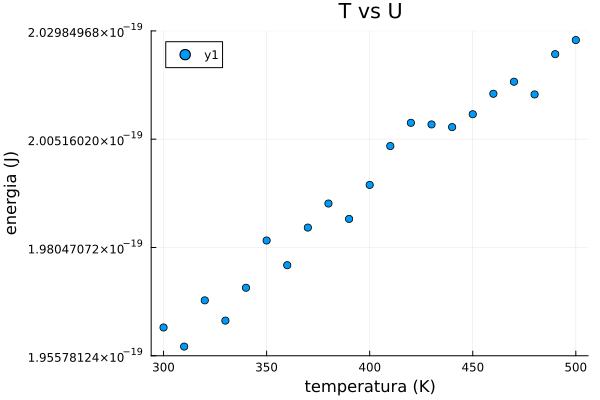

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


In [77]:
Plots.scatter(T,mean_energy)
Plots.title!("T vs U")
Plots.xlabel!("temperatura (K)")
Plots.ylabel!("energia (J)")

Podemos perceber que a energia e a temperatura possuem uma relação linear. Logo, eu decidi então fazer um ajuste linear

In [78]:
t = Table(energy = mean_energy,temperature = T)
t

Table with 2 columns and 21 rows:
      energy       temperature
    ┌─────────────────────────
 1  │ 1.96224e-19  300
 2  │ 1.95788e-19  310
 3  │ 1.96842e-19  320
 4  │ 1.9638e-19   330
 5  │ 1.97129e-19  340
 6  │ 1.98206e-19  350
 7  │ 1.97643e-19  360
 8  │ 1.98501e-19  370
 9  │ 1.99049e-19  380
 10 │ 1.98698e-19  390
 11 │ 1.99473e-19  400
 12 │ 2.00359e-19  410
 13 │ 2.00889e-19  420
 14 │ 2.00852e-19  430
 15 │ 2.00791e-19  440
 16 │ 2.01084e-19  450
 17 │ 2.01551e-19  460
 18 │ 2.01825e-19  470
 19 │ 2.01536e-19  480
 20 │ 2.02454e-19  490
 21 │ 2.02775e-19  500

In [79]:
ols = lm(@formula(energy ~ temperature),t)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

energy ~ 1 + temperature

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  1.85556e-19  5.83363e-22  318.08    <1e-36  1.84335e-19  1.86777e-19
temperature  3.46879e-23  1.44198e-24   24.06    <1e-14  3.16698e-23  3.7706e-23
─────────────────────────────────────────────────────────────────────────────────

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


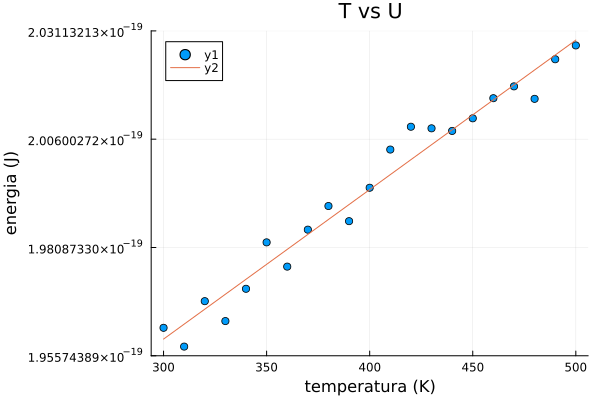

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


In [80]:
plot!(T,predict(ols))

In [112]:
sqrt(mse(predict(ols),mean_energy))

3.8060244595901744e-22

In [100]:
savefig("imagens/grafico.png")

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


"/home/mickael/faculdade/7º semestre/mecânica estatística/projeto_mec_estatistica/metropolis_alg/imagens/grafico.png"

In [81]:
α = coef(ols)[2]
k_B = 1.38e-23
2*α/(3*k_B) # não tá muito certo fazer isso, mas....

1.675744547225142

In [82]:
sum(EE[1])

1.9622375927467107e-16

In [83]:
sum(ℯ.^(-ββ[1].*EE[1]))

LoadError: UndefVarError: `ββ` not defined

In [84]:
sum(EE[1])

1.9622375927467107e-16

In [85]:
ℯ^(-ββ[1]*sum(EE[1]))

LoadError: UndefVarError: `ββ` not defined

In [86]:
ββ[1]

LoadError: UndefVarError: `ββ` not defined

In [87]:
logZ=-sum(EE[1]) * ββ[1]

LoadError: UndefVarError: `ββ` not defined

In [88]:
exp(-sum(EE[1]) * ββ[1])

LoadError: UndefVarError: `ββ` not defined

## Calculando a função de Partição:

$$Z = \sum_i e^{-\beta E_i}$$

Para evitar underflow numérico
Está sendo usado

$$\log Z = -\sum_i \beta E_i$$

In [89]:
logZ = []
for i in 1:length(ββ)
    push!(logZ,sum(-ββ[i].*EE[i]))
    end
logZ

LoadError: UndefVarError: `ββ` not defined

In [90]:
final_energy

LoadError: UndefVarError: `final_energy` not defined

Obtendo a energia média pela função de partição

$$\bar E = -\frac{\partial \ln Z}{\partial \beta}$$

In [91]:
U = [0;-diff(logZ)./diff(ββ)]

LoadError: UndefVarError: `ββ` not defined

In [92]:
mean_energy

21-element Vector{Float64}:
 1.9622375927467108e-19
 1.95787752075691e-19
 1.968419606876192e-19
 1.9637996719578597e-19
 1.9712903942015613e-19
 1.9820621520208306e-19
 1.9764329221623268e-19
 1.9850100884583188e-19
 1.9904914167510945e-19
 1.9869817396291247e-19
 1.9947344729637097e-19
 2.0035934492178893e-19
 2.0088885464820812e-19
 2.008520022933443e-19
 2.0079147968010404e-19
 2.010844750596606e-19
 2.015509678910598e-19
 2.0182538436330579e-19
 2.0153619276766822e-19
 2.0245443408979685e-19
 2.027753403972559e-19

## Calcular a entropia

Estou usando a entropia de Shannon que é dado por:

$$S = -k_B \sum_j P_j \ln P_j$$

onde $$P_j = \frac{\exp (-\beta E_j)}{\sum_k \exp (-\beta E_k)}$$

ou

$$P_j = \frac{\exp (-\beta E_j)}{Z}$$

Como está sendo usado $\log Z$ para evitar underflow numérico

$$\log P_j = -\beta E_j - \log Z$$

Obtendo as probabilidades

In [93]:
logP = []
for i in 1:length(logZ)
    for j in 1:length(EE[i])
        push!(logP,-ββ[i] * EE[i][j] .- logZ[i])
    end
end

P = exp.(logP)  # Aplica exp. elemento por elemento


Any[]

In [94]:
len

LoadError: UndefVarError: `len` not defined

Obtendo a entropia $S$.

In [95]:
S = []
for i in 1:length(P)
    push!(S,-k_B*sum(P[i].*log.(P[i])))
end
S

Any[]

A temperatura vai ser dada por

$$T = \frac{\partial \bar E}{\partial S}$$

In [96]:
U = [0; -diff(log.(Z))./(diff(ββ))]

LoadError: UndefVarError: `Z` not defined

In [97]:
dU = [0;diff(U)]

LoadError: UndefVarError: `U` not defined

In [98]:
dS = [0;diff(S)]

1-element Vector{Any}:
 0

In [99]:
scatter(T,U)

LoadError: UndefVarError: `U` not defined

In [101]:
T

21-element Vector{Int64}:
 300
 310
 320
 330
 340
 350
 360
 370
 380
 390
 400
 410
 420
 430
 440
 450
 460
 470
 480
 490
 500